**Classification with Data Augmentation using CNNs**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax,Conv2D,MaxPooling2D,Conv1D,MaxPooling1D
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.3.0


In [ ]:
#loading the dataset
data=tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test)=data
x_val=x_train[:5000,:,:,:]
x_train=x_train[5000:,:,:,:]
y_val=y_train[:5000]
y_train=y_train[5000:]

print("shape of training set",x_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
shape of training set (45000, 32, 32, 3)


In [ ]:
# transformation and rescaling of pixels
x_train=x_train/255.
x_val=x_val/255.
x_train=(x_train - 0.5)/0.5
x_val=(x_val - 0.5)/0.5

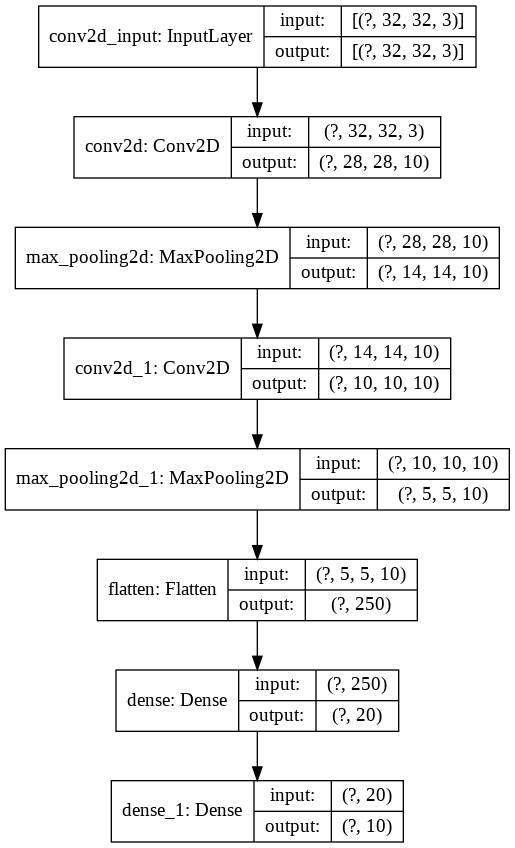

In [ ]:
#creating the model
model= Sequential([Conv2D(filters=10,kernel_size=(5,5),activation='relu',strides=1,input_shape=(32,32,3),kernel_initializer=tf.keras.initializers.HeNormal()),
                   MaxPooling2D((2,2),strides=2),
                   Conv2D(filters=10,kernel_size=(5,5),activation='relu',strides=1),
                   MaxPooling2D((2,2),strides=2),
                   Flatten(),
                   Dense(20,'relu'),
                   Dense(10,'softmax')])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
## Compiling and training the model
opt= tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# training the model
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_val, y_val),verbose=2,batch_size=256)

# Saving the model
model.save('model_q3')

Epoch 1/200
176/176 - 29s - loss: 0.9154 - accuracy: 0.6786 - val_loss: 1.0380 - val_accuracy: 0.6434
Epoch 2/200
176/176 - 28s - loss: 0.9117 - accuracy: 0.6819 - val_loss: 1.0586 - val_accuracy: 0.6354
Epoch 3/200
176/176 - 28s - loss: 0.9093 - accuracy: 0.6816 - val_loss: 1.0366 - val_accuracy: 0.6484
Epoch 4/200
176/176 - 28s - loss: 0.9034 - accuracy: 0.6816 - val_loss: 1.0289 - val_accuracy: 0.6486
Epoch 5/200
176/176 - 28s - loss: 0.9030 - accuracy: 0.6829 - val_loss: 1.0409 - val_accuracy: 0.6346
Epoch 6/200
176/176 - 28s - loss: 0.9001 - accuracy: 0.6838 - val_loss: 1.0270 - val_accuracy: 0.6480
Epoch 7/200
176/176 - 28s - loss: 0.9001 - accuracy: 0.6855 - val_loss: 1.0292 - val_accuracy: 0.6500
Epoch 8/200
176/176 - 28s - loss: 0.8965 - accuracy: 0.6841 - val_loss: 1.0437 - val_accuracy: 0.6388
Epoch 9/200
176/176 - 28s - loss: 0.8980 - accuracy: 0.6849 - val_loss: 1.0310 - val_accuracy: 0.6464
Epoch 10/200
176/176 - 28s - loss: 0.8893 - accuracy: 0.6884 - val_loss: 1.0231 - 

In [ ]:
#loading the saved model
model=tf.keras.models.load_model('model_q3')
# Check its architecture
model.summary()

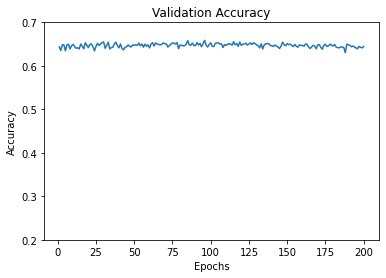

In [ ]:
##getting the plot of validation accuracy
acc_df= pd.DataFrame(history.history)

epochs= [i for i in range(1,201)]
plt.ylim([0.2,0.7])
plt.plot(epochs, acc_df['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

In [ ]:
## writing and loading the history dataframe into a csv file for reproducability
acc_df.to_csv('base_val.csv')
pd.read_csv('base_val.csv')

**Model 2 for augmented dataset**

In [ ]:
# Re-preparing the training dataset
x_train=x_train*0.5+0.5

In [ ]:
augmented_train= np.concatenate((np.minimum(x_train * 1.1, 1), x_train*0.9 ,tf.image.flip_left_right(x_train),x_train))
print("shape of augmented feature set",augmented_train.shape)

shape of augmented feature set (180000, 32, 32, 3)


**Verification plots**

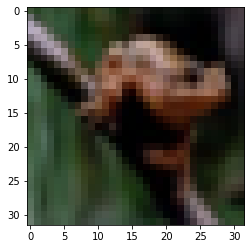

In [ ]:
plt.imshow(x_train[0,:,:,:])

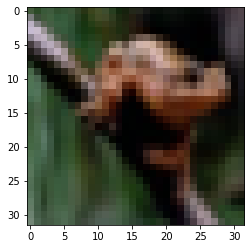

In [ ]:
plt.imshow(augmented_train[0,:,:,:])

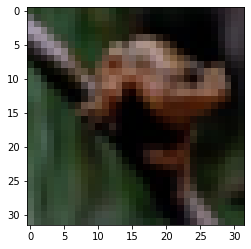

In [ ]:
plt.imshow(augmented_train[45000,:,:,:])

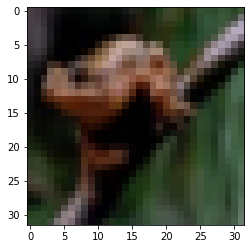

In [ ]:
plt.imshow(augmented_train[90000,:,:,:])

In [ ]:
# rescaling back to -1 to 1
augmented_train=(augmented_train - 0.5)/0.5

In [ ]:
##creating the y_train
y_train=np.concatenate((y_train,y_train,y_train,y_train))
print("shape of training labels",y_train.shape)

shape of training labels (180000, 1)


In [ ]:
#creating the model
model= Sequential([Conv2D(filters=10,kernel_size=(5,5),activation='relu',strides=1,input_shape=(32,32,3),kernel_initializer=tf.keras.initializers.HeNormal()),
                   MaxPooling2D((2,2),strides=2),
                   Conv2D(filters=10,kernel_size=(5,5),activation='relu',strides=1),
                   MaxPooling2D((2,2),strides=2),
                   Flatten(),
                   Dense(20,'relu'),
                   Dense(10,'softmax')])
keras.utils.plot_model(model, show_shapes=True)

## Compiling and training the model
opt= tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# training the model
history=model.fit(augmented_train,y_train,epochs=200,validation_data=(x_val, y_val),verbose=2,batch_size=256)

# Saving the model
model.save('model_q3_2')


Epoch 1/200
704/704 - 3s - loss: 1.5527 - accuracy: 0.4400 - val_loss: 1.3380 - val_accuracy: 0.5178
Epoch 2/200
704/704 - 3s - loss: 1.2680 - accuracy: 0.5494 - val_loss: 1.2079 - val_accuracy: 0.5644
Epoch 3/200
704/704 - 3s - loss: 1.1782 - accuracy: 0.5850 - val_loss: 1.1460 - val_accuracy: 0.5926
Epoch 4/200
704/704 - 3s - loss: 1.1201 - accuracy: 0.6081 - val_loss: 1.1069 - val_accuracy: 0.6060
Epoch 5/200
704/704 - 3s - loss: 1.0809 - accuracy: 0.6230 - val_loss: 1.0974 - val_accuracy: 0.6096
Epoch 6/200
704/704 - 3s - loss: 1.0522 - accuracy: 0.6343 - val_loss: 1.0921 - val_accuracy: 0.6194
Epoch 7/200
704/704 - 3s - loss: 1.0274 - accuracy: 0.6417 - val_loss: 1.0567 - val_accuracy: 0.6306
Epoch 8/200
704/704 - 3s - loss: 1.0060 - accuracy: 0.6495 - val_loss: 1.0583 - val_accuracy: 0.6368
Epoch 9/200
704/704 - 3s - loss: 0.9877 - accuracy: 0.6557 - val_loss: 1.0594 - val_accuracy: 0.6322
Epoch 10/200
704/704 - 3s - loss: 0.9715 - accuracy: 0.6606 - val_loss: 1.0370 - val_accura

In [ ]:
p3_dir = "/content/drive/My Drive/Colab Notebooks/problem_3"
model.save(f"{p3_dir}/model_q3_2")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/problem_3/model_q3_2/assets


In [ ]:
##loading the model
model= tf.keras.models.load_model('model_q3_2')

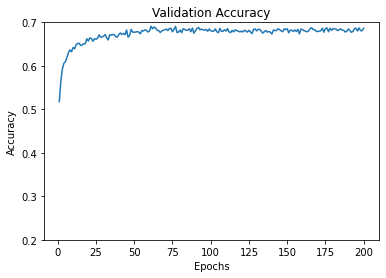

In [ ]:
##getting the plot of validation accuracy
acc_df= pd.DataFrame(history.history)

epochs= [i for i in range(1,201)]
plt.ylim([0.2,0.7])
plt.plot(epochs, acc_df['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

**Conclusion**- The model with augmented dataset performs slightly better